In [1]:
from src.dfa_rl.dfa import DFA

dfa = DFA("../dfas/tenstates.dot")
print(dfa)
print("States:", dfa.states)
print("Accepting:", sorted(dfa.accept_states))
print("Alphabet:", dfa.alphabet)
print("δ(s0,'b') =", dfa.next_state("s0", "b"))
print("δ(s1,'a') =", dfa.next_state("s1", "a"))
print("Is s3 accepting?", dfa.is_accepting("s3"))


FSA(states=11, alphabet=['a', 'b'], accepting=['s9'])
States: ['start', 's9', 's0', 's6', 's5', 's1', 's8', 's2', 's7', 's4', 's3']
Accepting: ['s9']
Alphabet: ['a', 'b']
δ(s0,'b') = s5
δ(s1,'a') = s8
Is s3 accepting? False


In [2]:
from src.dfa_rl.dfa_env import DFAEnv

dfa = DFA("../dfas/tenstates.dot")
env = DFAEnv(dfa=dfa,
             max_steps=10,
             seed=42,
             step_penalty=-0.02,
             reward_goal=1.0)
obs = env.reset()
print("reset → obs:", obs)

done = False
while not done:
    a = env.sample_action()
    obs, r, done, info = env.step(a)
    print(f"step(a={a} '{env.idx_to_action[a]}') → obs={obs} reward={r} done={done} state={info['state']}")


reset → obs: 0
step(a=0 'a') → obs=1 reward=-0.02 done=False state=s6
step(a=1 'b') → obs=2 reward=-0.02 done=False state=s2
step(a=0 'a') → obs=1 reward=-0.02 done=False state=s7
step(a=0 'a') → obs=1 reward=-0.02 done=False state=s3
step(a=0 'a') → obs=1 reward=-0.02 done=False state=s1
step(a=0 'a') → obs=1 reward=-0.02 done=False state=s8
step(a=0 'a') → obs=1 reward=1.0 done=True state=s9


In [3]:
from src.dfa_rl.dqn_train import dqn_train
qnet, logs = dqn_train(
    env=DFAEnv(dfa = DFA("../dfas/tenstates.dot"), max_steps=10, seed=42, step_penalty=-0.01, reward_goal=1.0),
    n_hist=3,
    episodes=2000,
    gamma=0.95,
    lr=1e-3,
    batch_size=64,
    start_learning_after=300,
    target_update_every=200,
    eps_start=1.0,
    eps_end=0.01,
    eps_decay_steps=3000,
    seed=20,
    device="cpu",
)

Episode  200/2000 | recent win-rate(50)=0.78 | steps=3 total_r=1.0
Episode  400/2000 | recent win-rate(50)=0.82 | steps=1 total_r=1.0
Episode  600/2000 | recent win-rate(50)=0.84 | steps=1 total_r=1.0
Episode  800/2000 | recent win-rate(50)=0.90 | steps=1 total_r=1.0
Episode 1000/2000 | recent win-rate(50)=0.94 | steps=4 total_r=1.0
Episode 1200/2000 | recent win-rate(50)=0.96 | steps=1 total_r=1.0
Episode 1400/2000 | recent win-rate(50)=0.90 | steps=4 total_r=1.0
Episode 1600/2000 | recent win-rate(50)=0.88 | steps=8 total_r=0.9
Episode 1800/2000 | recent win-rate(50)=0.90 | steps=4 total_r=1.0
Episode 2000/2000 | recent win-rate(50)=0.82 | steps=10 total_r=-0.1


[0.94, 0.96, -0.09999999999999999, 0.99, 1.0, -0.09999999999999999, 0.95, 0.99, -0.09999999999999999, 0.98, -0.09999999999999999, -0.09999999999999999, 0.91, -0.09999999999999999, -0.09999999999999999, 0.94, 0.91, 0.96, -0.09999999999999999, 0.92, 0.98, -0.09999999999999999, 0.9299999999999999, -0.09999999999999999, -0.09999999999999999, 0.97, 0.92, -0.09999999999999999, 0.96, 0.96, 0.98, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, 0.94, -0.09999999999999999, 0.98, 0.97, 0.98, 0.9299999999999999, 0.96, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, 0.99, 0.96, -0.09999999999999999, -0.09999999999999999, 0.97, -0.09999999999999999, 0.98, 0.97, 0.97, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, 0.99, 0.97, -0.09999999999999999, -0.09999999999999999, -0.09999999999999999, 0.97, -0.09999999999999999, -0.09999999999999999, 0.98, -0.09999999999

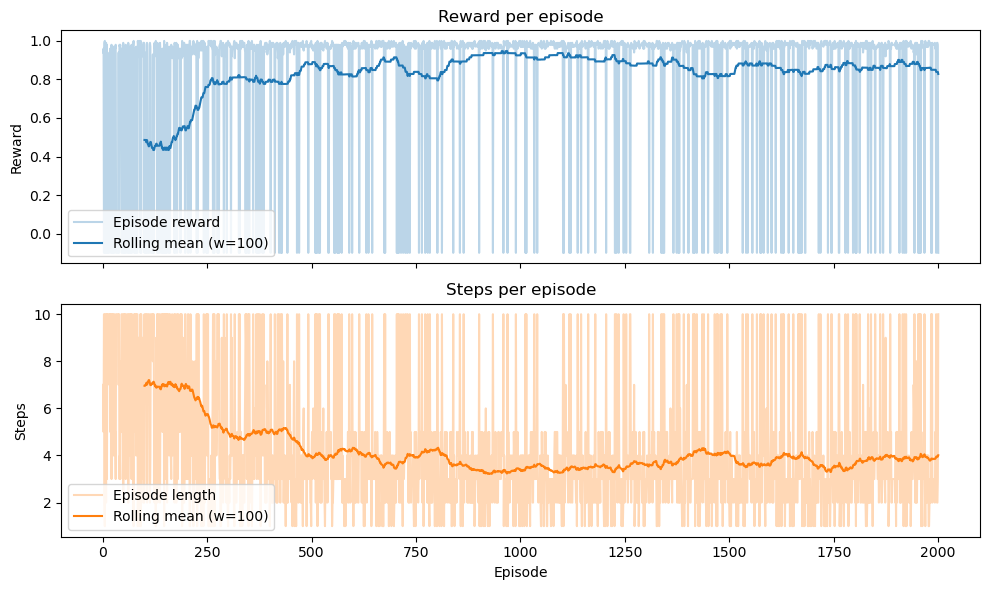

In [4]:
from src.dfa_rl.plotter import plot_training

plot_training(logs, window=100)